In [1]:
library(fpp)
library(fpp2)
library(fGarch)
library(quantmod)
library(psych)
library(rugarch)
library(TSA)
library(ggplot2)

Warning message:
"package 'fpp' was built under R version 3.6.2"Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: fma
Warning message:
"package 'fma' was built under R version 3.6.2"Loading required package: expsmooth
Warning message:
"package 'expsmooth' was built under R version 3.6.2"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.2"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: tseries
Warning message:
"package 'tseries' was built under R version 3.6.2"Warning message:
"package 'fpp2' was built under R 

In [2]:
getSymbols("^SML",from='1999-01-01',to='2020-04-08',src='yahoo')

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
"'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated")."

[1] "^SML"

### Descriptive statistical analysis

In [3]:
dim(SML)

[1] 5350    6

In [4]:
head(SML)
tail(SML)

           SML.Open SML.High SML.Low SML.Close SML.Volume SML.Adjusted
1999-01-04   177.37   177.92  176.40    176.41          0       176.41
1999-01-05   176.41   176.94  176.21    176.33          0       176.33
1999-01-06   176.33   178.77  176.33    178.45          0       178.45
1999-01-07   178.45   178.53  176.79    177.94          0       177.94
1999-01-08   177.94   179.35  177.47    178.90          0       178.90
1999-01-11   178.90   179.59  178.17    179.19          0       179.19

           SML.Open SML.High SML.Low SML.Close SML.Volume SML.Adjusted
2020-03-31   682.74   691.24  671.95    684.84     672900       684.84
2020-04-01   663.17   663.17  630.15    635.66     665700       635.66
2020-04-02   631.56   657.06  627.26    645.29     699300       645.29
2020-04-03   640.98   645.26  610.39    622.35     744200       622.35
2020-04-06   645.21   675.91  645.21    674.65     669500       674.65
2020-04-07   692.62   709.88  673.13    677.65     824400       677.65

In [37]:
data=SML[,6]
rt=dailyReturn(data,type="log")
simplertn=dailyReturn(data)

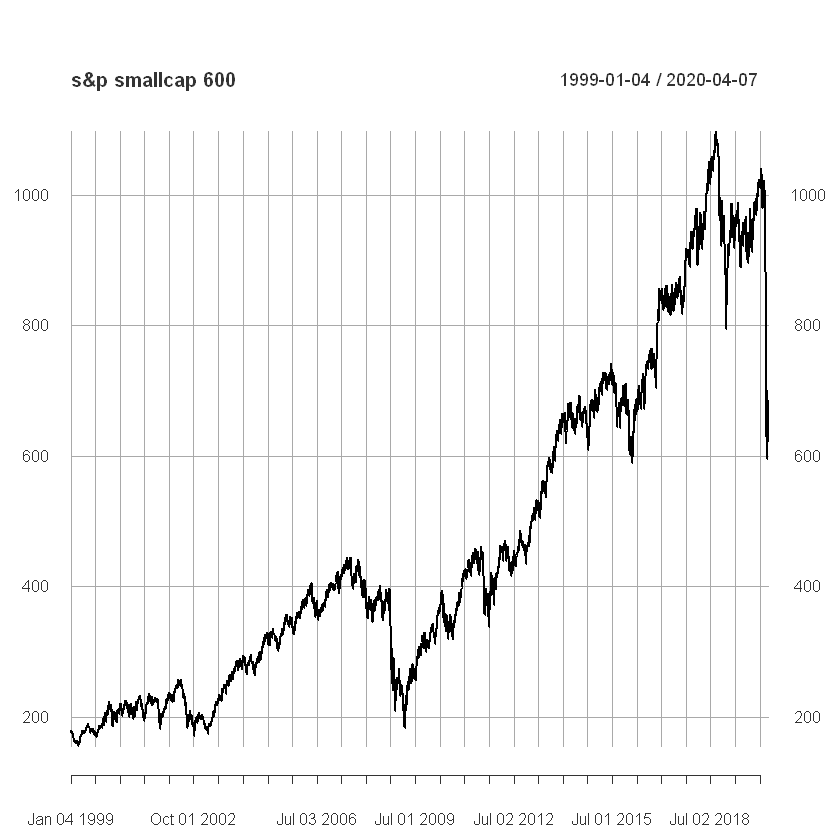

In [38]:
plot(data,xlab="time",ylab="price",main="s&p smallcap 600")

In [7]:
head(rt)

           daily.returns
1999-01-04  0.0000000000
1999-01-05 -0.0004536032
1999-01-06  0.0119511824
1999-01-07 -0.0028620071
1999-01-08  0.0053805309
1999-01-11  0.0016197496

In [8]:
train=rt[1:5000]

In [9]:
test=rt[5001:5350]

In [10]:
tail(train)

           daily.returns
2018-11-06   0.005657306
2018-11-07   0.011955523
2018-11-08  -0.002553475
2018-11-09  -0.017205782
2018-11-12  -0.018229206
2018-11-13  -0.001823488

In [11]:
head(test)

           daily.returns
2018-11-14  -0.007570492
2018-11-15   0.013010126
2018-11-16   0.003020892
2018-11-19  -0.016464483
2018-11-20  -0.018580388
2018-11-21   0.009733433

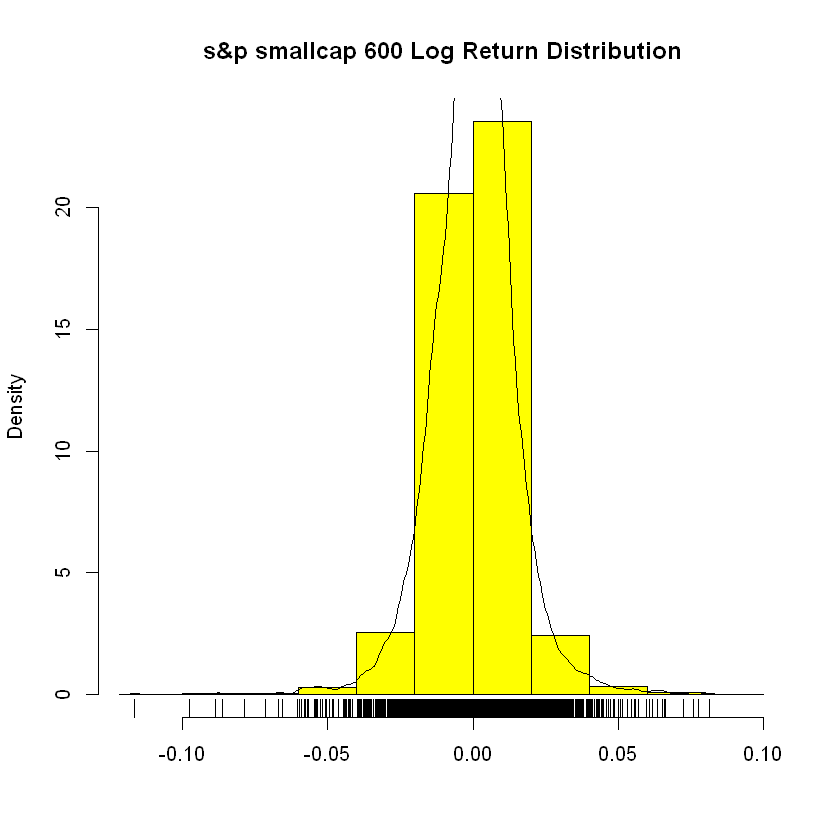

In [36]:
hist(train,main="s&p smallcap 600 Log Return Distribution",col="yellow",xlab="",probability=T)
lines(density(train),lwd=1)
rug(train)#Data distribution

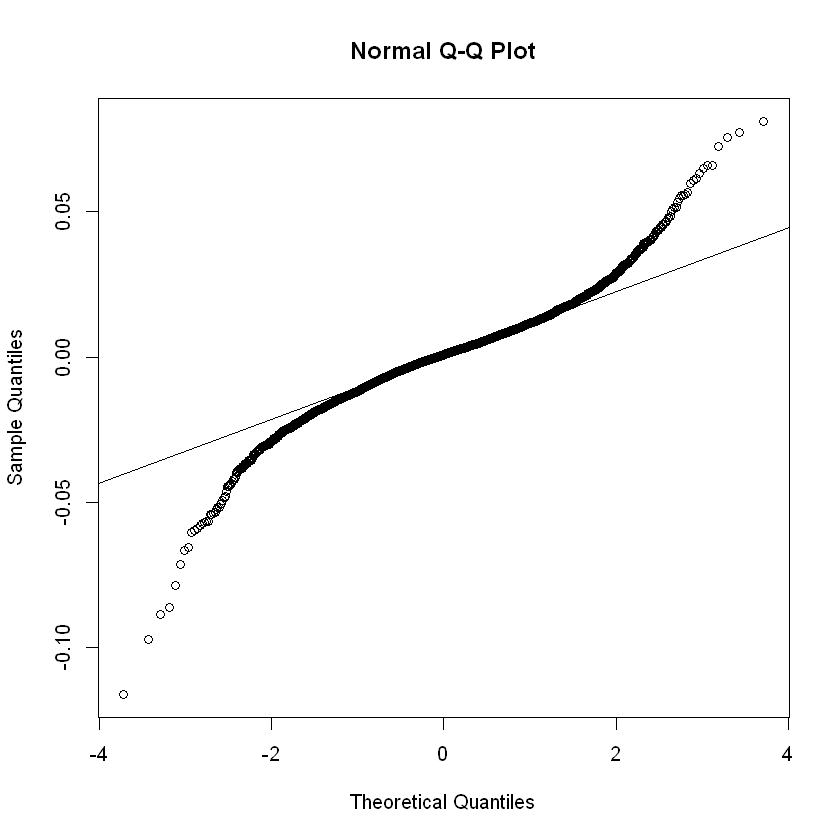

In [13]:
qqnorm(train)
qqline(train)

Financial time series do show sharp peaks and thick tails. Compared to the standard normal distribution, the kurtosis is higher, and the tails of the two segments are thicker, which means more extreme values.

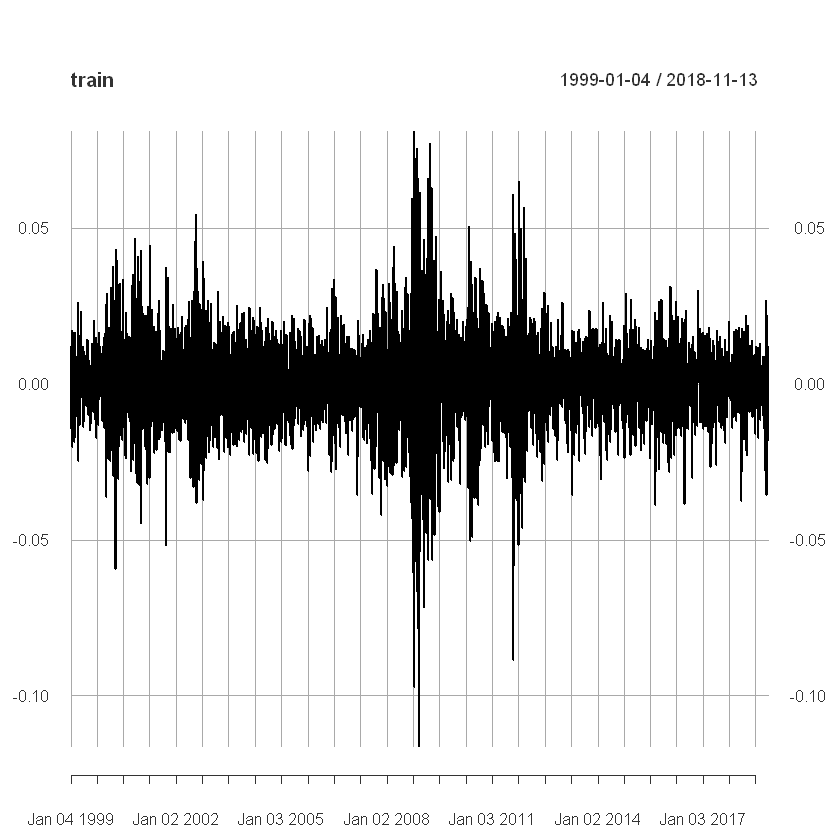

In [14]:
plot(train)

The stock index yield series all show a certain degree of volatility and aggregation within the sample interval, of which the fluctuation range is particularly obvious in 2008

In [15]:
describe(train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,5000,0.0003374322,0.01399809,0.0008332765,0.0004810626,0.01088771,-0.1162522,0.08115678,0.197409,-0.2618735,4.851362,0.0001979629


### Pure randomness test & Stationarity test

In [16]:
Box.test(train,type='Ljung-Box')


	Box-Ljung test

data:  train
X-squared = 13.068, df = 1, p-value = 0.0003005


The test results show that this time series is not a pure random number series, and can be further tested and modeled.

In [17]:
adf.test(train,alt="stationary")

Warning message in adf.test(train, alt = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -16.692, Lag order = 17, p-value = 0.01
alternative hypothesis: stationary


The test results are consistent with previous research. It is generally believed that the price of financial assets is non-stationary, while the return rate series is stable.

In [18]:
ndiffs(train)

[1] 0

### ARIMA model & ARCH effect test

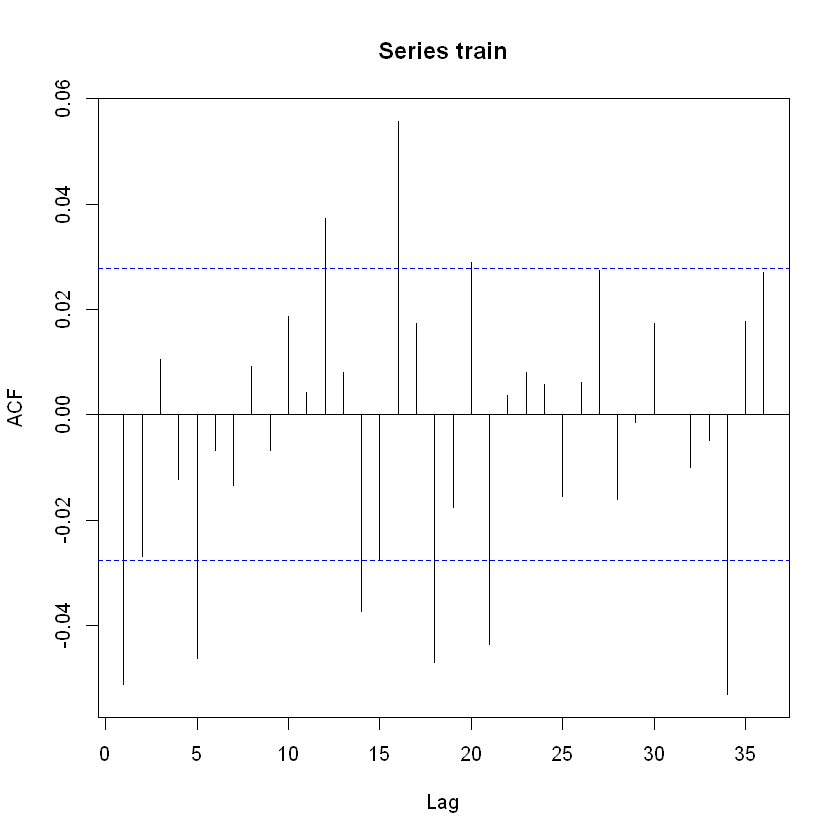

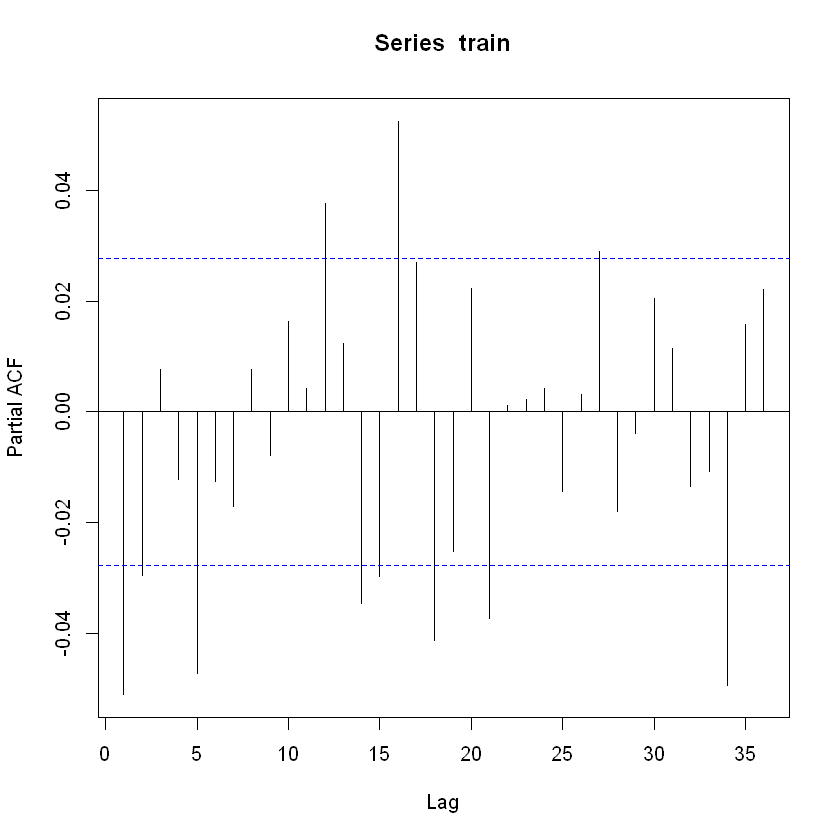

In [19]:
acf(train)
pacf(train)

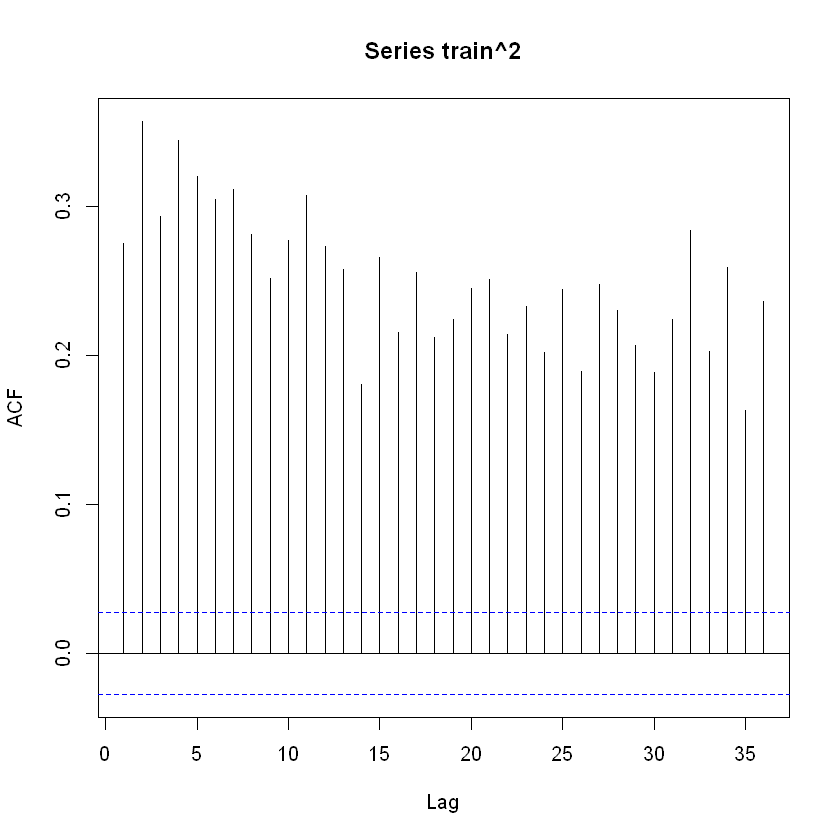

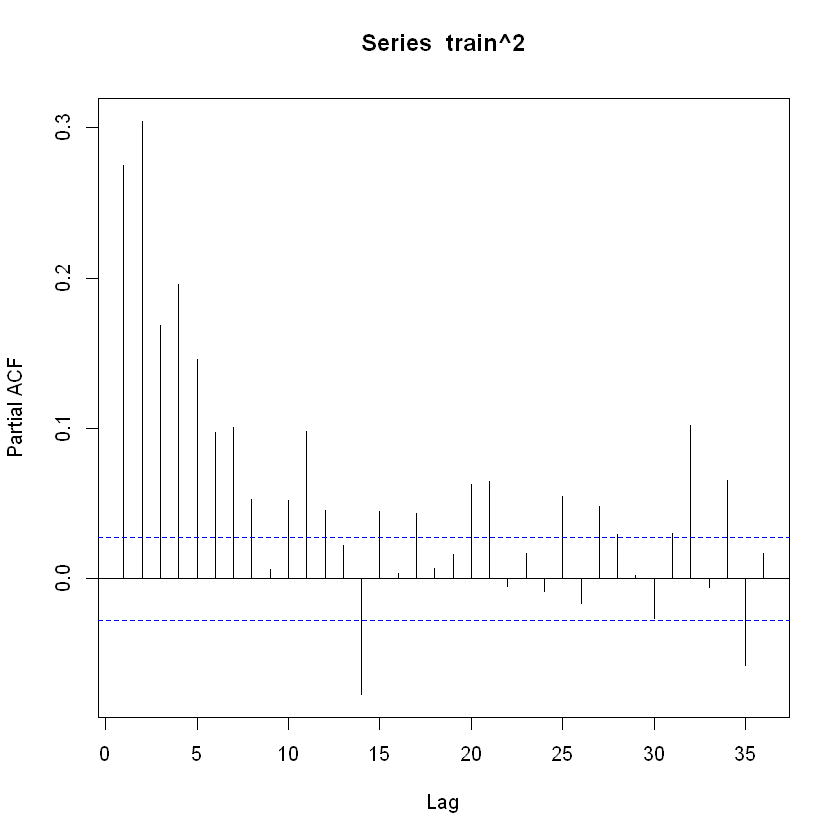

In [20]:
acf(train^2)
pacf(train^2)

In [21]:
auto.arima(train)

Series: train 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1   mean
      0.6369  -0.6844  3e-04
s.e.  0.1340   0.1269  2e-04

sigma^2 estimated as 0.0001953:  log likelihood=14259.45
AIC=-28510.9   AICc=-28510.89   BIC=-28484.83

In [22]:
m1=arima(train,order=c(1,0,1))
summary(m1)


Call:
arima(x = train, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.6369  -0.6844      3e-04
s.e.  0.1340   0.1269      2e-04

sigma^2 estimated as 0.0001952:  log likelihood = 14259.45,  aic = -28512.9

Training set error measures:


Warning message in trainingaccuracy(f, test, d, D):
"test elements must be within sample"

              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN


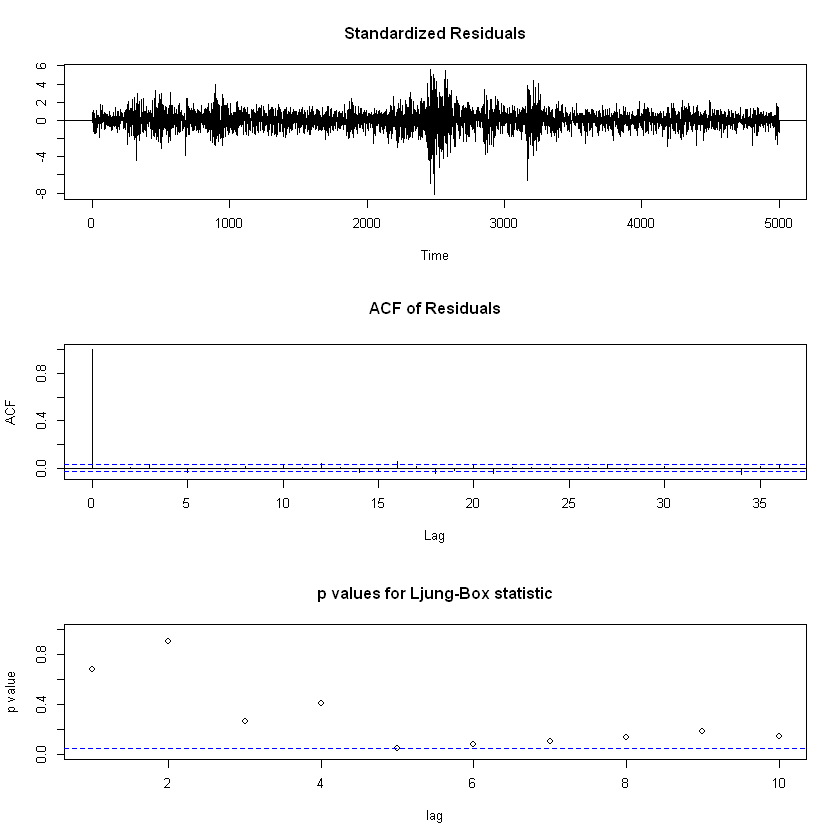

In [23]:
tsdiag(m1)

In [24]:
Box.test(m1$residuals,10,type='Ljung')


	Box-Ljung test

data:  m1$residuals
X-squared = 14.619, df = 10, p-value = 0.1466


In [25]:
Box.test(m1$residuals^2,10,type='Ljung')


	Box-Ljung test

data:  m1$residuals^2
X-squared = 4661.4, df = 10, p-value < 2.2e-16


In [26]:
m2=garchFit(~arma(1,1)+garch(1,1),data=train,trace=F) 
summary(m2)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 1) + garch(1, 1), data = train, trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 1) + garch(1, 1)
<environment: 0x000000008826a7d8>
 [data = train]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ma1        omega       alpha1        beta1  
 2.3515e-05   9.6341e-01  -9.7779e-01   3.1578e-06   8.5292e-02   8.9525e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      2.351e-05   1.298e-05    1.812     0.07 .  
ar1     9.634e-01   1.815e-02   53.076  < 2e-16 ***
ma1    -9.778e-01   1.413e-02  -69.190  < 2e-16 ***
omega   3.158e-06   5.898e-07    5.354 8.61e-08 ***
alpha1  8.529e-02   8.646e-03    9.865  < 2e-16 ***
beta1   8.952e-01   1.064e-02   84.108  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 15084.48    normalized:  3.016896 

Description:
 Fri Apr 24 23:51:55 2020

In [27]:
m4=garchFit(~arma(1,1)+garch(1,1),data=train,trace=F，cond.dist=c("std")) 
summary(m4)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 1) + garch(1, 1), data = train, cond.dist = c("std"), 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 1) + garch(1, 1)
<environment: 0x000000007ff38a00>
 [data = train]

Conditional Distribution:
 std 

Coefficient(s):
         mu          ar1          ma1        omega       alpha1        beta1  
 3.9936e-05   9.4574e-01  -9.6301e-01   2.3851e-06   8.0940e-02   9.0748e-01  
      shape  
 1.0000e+01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      3.994e-05   2.711e-05    1.473    0.141    
ar1     9.457e-01   3.430e-02   27.571   <2e-16 ***
ma1    -9.630e-01   2.855e-02  -33.728   <2e-16 ***
omega   2.385e-06   5.807e-07    4.107    4e-05 ***
alpha1  8.094e-02   9.268e-03    8.733   <2e-16 ***
beta1   9.075e-01   1.067e-02   85.073   <2e-16 ***
shape   1.000e+01   1.057e+00    9.457   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 

In [28]:
m6=garchFit(~arma(1,1)+garch(1,1),data=train,trace=F，cond.dist=c("sstd")) 
summary(m6)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 1) + garch(1, 1), data = train, cond.dist = c("sstd"), 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 1) + garch(1, 1)
<environment: 0x000000008875ade0>
 [data = train]

Conditional Distribution:
 sstd 

Coefficient(s):
         mu          ar1          ma1        omega       alpha1        beta1  
 8.9476e-05   8.4924e-01  -8.8828e-01   2.0852e-06   7.7014e-02   9.1294e-01  
       skew        shape  
 8.7651e-01   1.0000e+01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      8.948e-05   3.822e-05    2.341   0.0192 *  
ar1     8.492e-01   6.083e-02   13.961  < 2e-16 ***
ma1    -8.883e-01   5.275e-02  -16.839  < 2e-16 ***
omega   2.085e-06   5.347e-07    3.900 9.62e-05 ***
alpha1  7.701e-02   8.670e-03    8.882  < 2e-16 ***
beta1   9.129e-01   9.947e-03   91.777  < 2e-16 ***
skew    8.765e-01   1.903e-02   46.055  < 2e-16 ***
shape   1.000e+01   1.033

compare the AIC of m3 m5 and m7, we choose m7 which has the lowest AIC as our model.

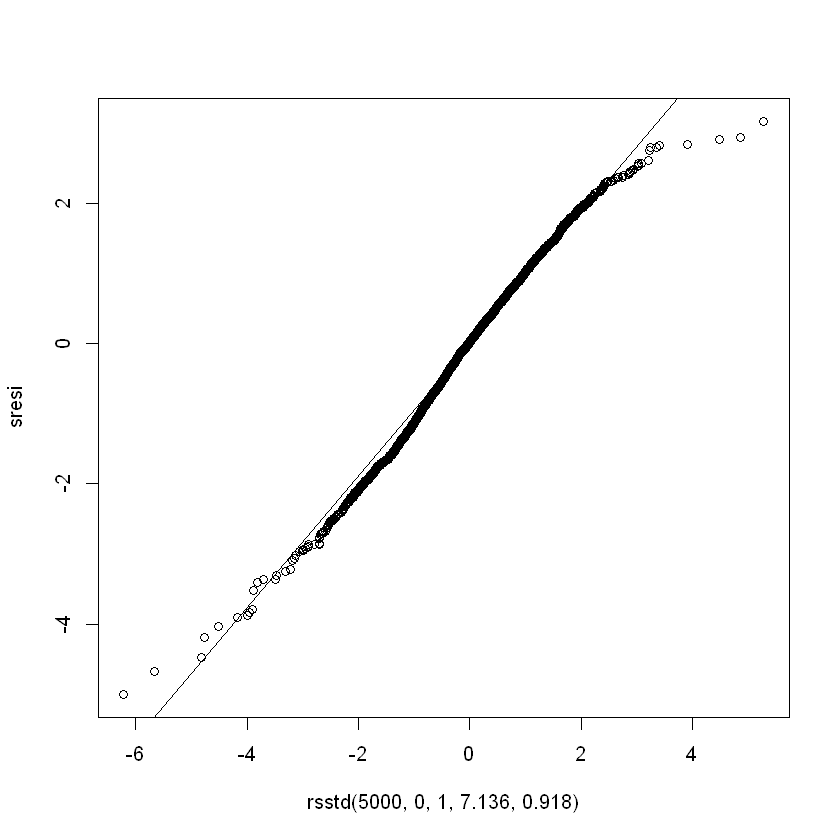

In [29]:
sresi=residuals(m6,standardize=T)
qqplot(rsstd(5000,0,1,7.136,0.918),sresi)
qqline(sresi)


	Box-Pierce test

data:  sresi
X-squared = 2.4317, df = 1, p-value = 0.1189


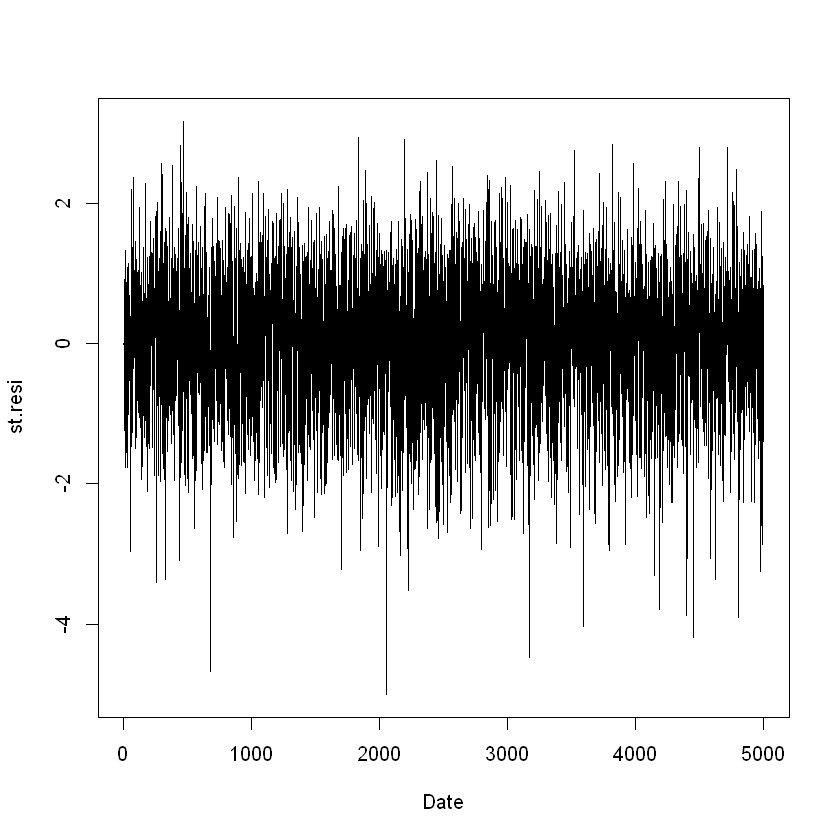

In [30]:
plot(sresi,xlab='Date',ylab='st.resi',type='l')
Box.test(sresi)

The above figure and the box test indicate that the residual do not have autocorrelation.

In [31]:
pr=predict(m6,10)
pr

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
0.0015309844,0.01366306,0.01366306
0.0013896566,0.01368111,0.01367071
0.0012696348,0.01369618,0.01367828
0.0011677068,0.01370908,0.01368577
0.0010811450,0.01372039,0.01369318
0.0010076329,0.01373054,0.01370052
0.0009452030,0.01373983,0.01370777
0.0008921848,0.01374848,0.01371495
0.0008471594,0.01375665,0.01372205


In [32]:
names(pr)

[1] "meanForecast"      "meanError"         "standardDeviation"

In [33]:
count1=0 
for (i in 1:350) 
{   
    data=rt[i:(5000+i), ]
model=garchFit(~arma(1,0)+garch(1,1),data=data,trace=F，cond.dist=c("sstd"))  
pre=predict(model,1)[1] 
if(as.numeric(pre$meanForecast)*(as.numeric(rt[5000+i,1]))>0){     
    count1=count1+1    
} 
}
count1

[1] 151

In [34]:
acc1=count1/350 
acc1

[1] 0.4314286